# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Kristover Armand
- **Email:** mkarmand43@gmail.com
- **ID Dicoding:** mk_armand_13

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren suhu bulanan di changping?
- Pertanyaan 2: Bagaimana tren PM2.5 bulanan di changping?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

## Data Wrangling

### Gathering Data

In [2]:
# Load dataset
data_df = pd.read_csv("data.csv")
data_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


### Assessing Data

Tipe Data

In [3]:
# Menampilkan informasi dataset
data_df.info()
print("Missing Values:")
print(data_df.isna().sum())
print("Duplicated Rows:", data_df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Missing Values:
No            0
year          0
month         0
day 

### Cleaning Data

In [4]:
# Mengubah data menjadi format datetime
data_df['date'] = pd.to_datetime(data_df[['year', 'month', 'day', 'hour']])
data_df.set_index('date', inplace=True)

In [5]:
# Menangani nilai yang hilang dengan imputasi
num_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
data_df[num_cols] = data_df[num_cols].fillna(data_df[num_cols].mean())
data_df['wd'].fillna(data_df['wd'].mode()[0], inplace=True)

<ipython-input-5-a70b7adb5f07>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df['wd'].fillna(data_df['wd'].mode()[0], inplace=True)


In [6]:
data_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [7]:
# Download data yang sudah di cleaning
data_df.to_csv("cleaned_data.csv", index=True)

## Exploratory Data Analysis (EDA)

### Explore ...

In [8]:
# Menampilkan statistik deskriptif
data_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Changping
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4916,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,NaN,1.853836,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.524179,82.746329,20.786642,29.237672,1078.866266,53.846809,11.356720,10.218370,13.811648,0.752352,NaN,1.309005,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,16.000000,3.400000,999.300000,-10.200000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,48.000000,74.000000,7.000000,37.000000,800.000000,47.000000,14.600000,1007.400000,1.700000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,129.000000,18.000000,60.000000,1400.000000,79.000000,23.300000,1016.000000,14.200000,0.000000,NaN,2.300000,NaN


In [9]:
# Analisis statistik dengan groupby
grouped_data = data_df.groupby(['year', 'month'])[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].agg(['min', 'max', 'mean'])

# Menampilkan ringkasan
grouped_data

PM2.5                    PM10                        SO2         \
             min    max        mean  min    max        mean     min    max   
year month                                                                   
2013 3       3.0  443.0   98.916667  3.0  653.0  123.430108  3.0000  164.0   
     4       2.0  286.0   59.364166  6.0  404.0   89.987025  0.2856  103.0   
     5       3.0  381.0   83.039247  3.0  502.0  118.168011  3.0000  120.0   
     6       2.0  391.0   83.402351  3.0  438.0  102.434247  0.2856  160.0   
     7       3.0  235.0   61.977151  2.0  258.0   65.270126  0.2856   45.0   
     8       3.0  268.0   55.350806  2.0  267.0   67.848967  1.0000   50.0   
     9       3.0  304.0   73.302778  4.0  309.0   82.976389  1.0000   59.0   
     10      3.0  327.0   82.656182  3.0  339.0  100.023734  0.2856   87.0   
     11      3.0  314.0   60.779167  6.0  297.0   81.325000  1.0000  122.0   
     12      3.0  375.0   67.145161  6.0  350.0   80.840054  2.0000  165.0   
2014 1       4.0  423.0   87.310209  6.0  999.0  109.545981  3.0000  235.0   
     2       3.0  581.0  136.232729  6.0  584.0  142.839481  1.0000  192.0   
     3       3.0  383.0   86.000000  5.0  479.0  127.849462  2.0000  132.0   
     4       3.0  510.0  101.056504  5.0  580.0  138.335780  2.0000   60.0   
     5       3.0  285.0   54.096505  3.0  546.0  100.433008  2.0000   63.0   
     6       3.0  182.0   46.240406  5.0  292.0   61.507053  2.0000   41.0   
     7       3.0  540.0   82.578864  5.0  540.0  100.996604  2.0000  101.0   
     8       3.0  227.0   56.629570  5.0  239.0   76.082201  2.0000   58.0   
     9       3.0  206.0   60.639999  3.0  220.0   78.920102  2.0000   50.0   
     10      3.0  404.0  115.286957  3.0  404.0  134.957732  2.0000   36.0   
     11      3.0  347.0   76.774580  5.0  858.0  118.723063  2.0000   79.0   
     12      3.0  300.0   51.381043  5.0  487.0   88.269100  2.0000  152.0   
2015 1       3.0  434.0   95.966526  4.0  445.0  114.676047  2.0000  147.0   
     2       3.0  388.0   86.733182  6.0  992.0  116.452812  2.0000  122.0   
     3       3.0  299.0   77.853355  7.0  976.0  141.686382  2.0000  310.0   
     4       3.0  419.0   61.053051  5.0  714.0   99.070285  2.0000   46.0   
     5       3.0  247.0   53.701874  5.0  407.0   87.359755  2.0000   42.0   
     6       3.0  500.0   58.968180  5.0  500.0   76.869443  2.0000   25.0   
     7       3.0  202.0   56.219354  5.0  223.0   66.655454  2.0000   47.0   
     8       3.0  157.0   38.931850  5.0  544.0   57.241405  2.0000   28.0   
     9       3.0  247.0   43.934161  5.0  247.0   51.874378  2.0000   29.0   
     10      3.0  276.0   51.974002  3.0  298.0   71.598998  2.0000   30.0   
     11      3.0  327.0   90.808191  3.0  387.0   99.595723  2.0000   52.0   
     12      3.0  479.0  120.801340  6.0  770.0  147.334536  2.0000   53.0   
2016 1       3.0  345.0   54.422981  5.0  428.0   80.400927  2.0000   67.0   
     2       3.0  882.0   37.585773  3.0  762.0   57.476444  2.0000  257.0   
     3       3.0  392.0   73.414243  5.0  635.0  125.011071  2.0000   57.0   
     4       3.0  239.0   56.795968  5.0  706.0  106.331359  2.0000   68.0   
     5       3.0  290.0   50.874323  5.0  933.0   77.981430  2.0000   26.0   
     6       3.0  184.0   53.245830  5.0  184.0   67.580957  2.0000   24.0   
     7       3.0  219.0   54.912765  5.0  219.0   67.965832  2.0000   75.0   
     8       3.0  123.0   36.777954  5.0  166.0   52.681381  2.0000   33.0   
     9       3.0  181.0   46.082353  6.0  213.0   58.208077  2.0000   27.0   
     10      3.0  380.0   79.617740  6.0  380.0   96.258489  2.0000   29.0   
     11      3.0  303.0   85.786111  6.0  421.0  119.687500  2.0000   47.0   
     12      3.0  596.0  110.097310  6.0  596.0  125.816285  2.0000   58.0   
2017 1       3.0  662.0   98.197715  5.0  775.0  113.862443  2.0000  111.0   
     2       3.0  335.0   59.878418  5.0  335.0   72.776629  2.0000   77.0   

                           NO2  

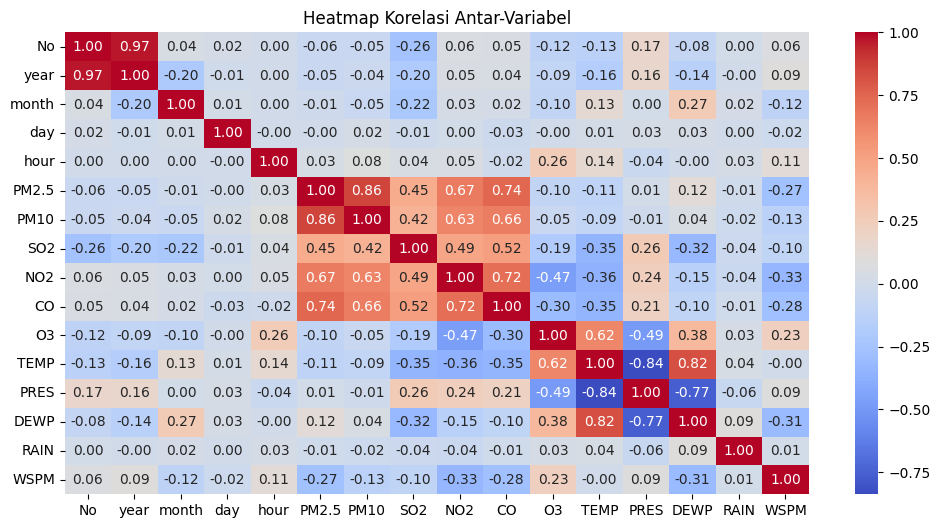

In [10]:
# Mengabaikan kolom non-numerik sebelum heatmap
numeric_cols = data_df.select_dtypes(include=[np.number]).columns

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.heatmap(data_df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar-Variabel")
plt.show()


<Figure size 1800x1500 with 0 Axes>

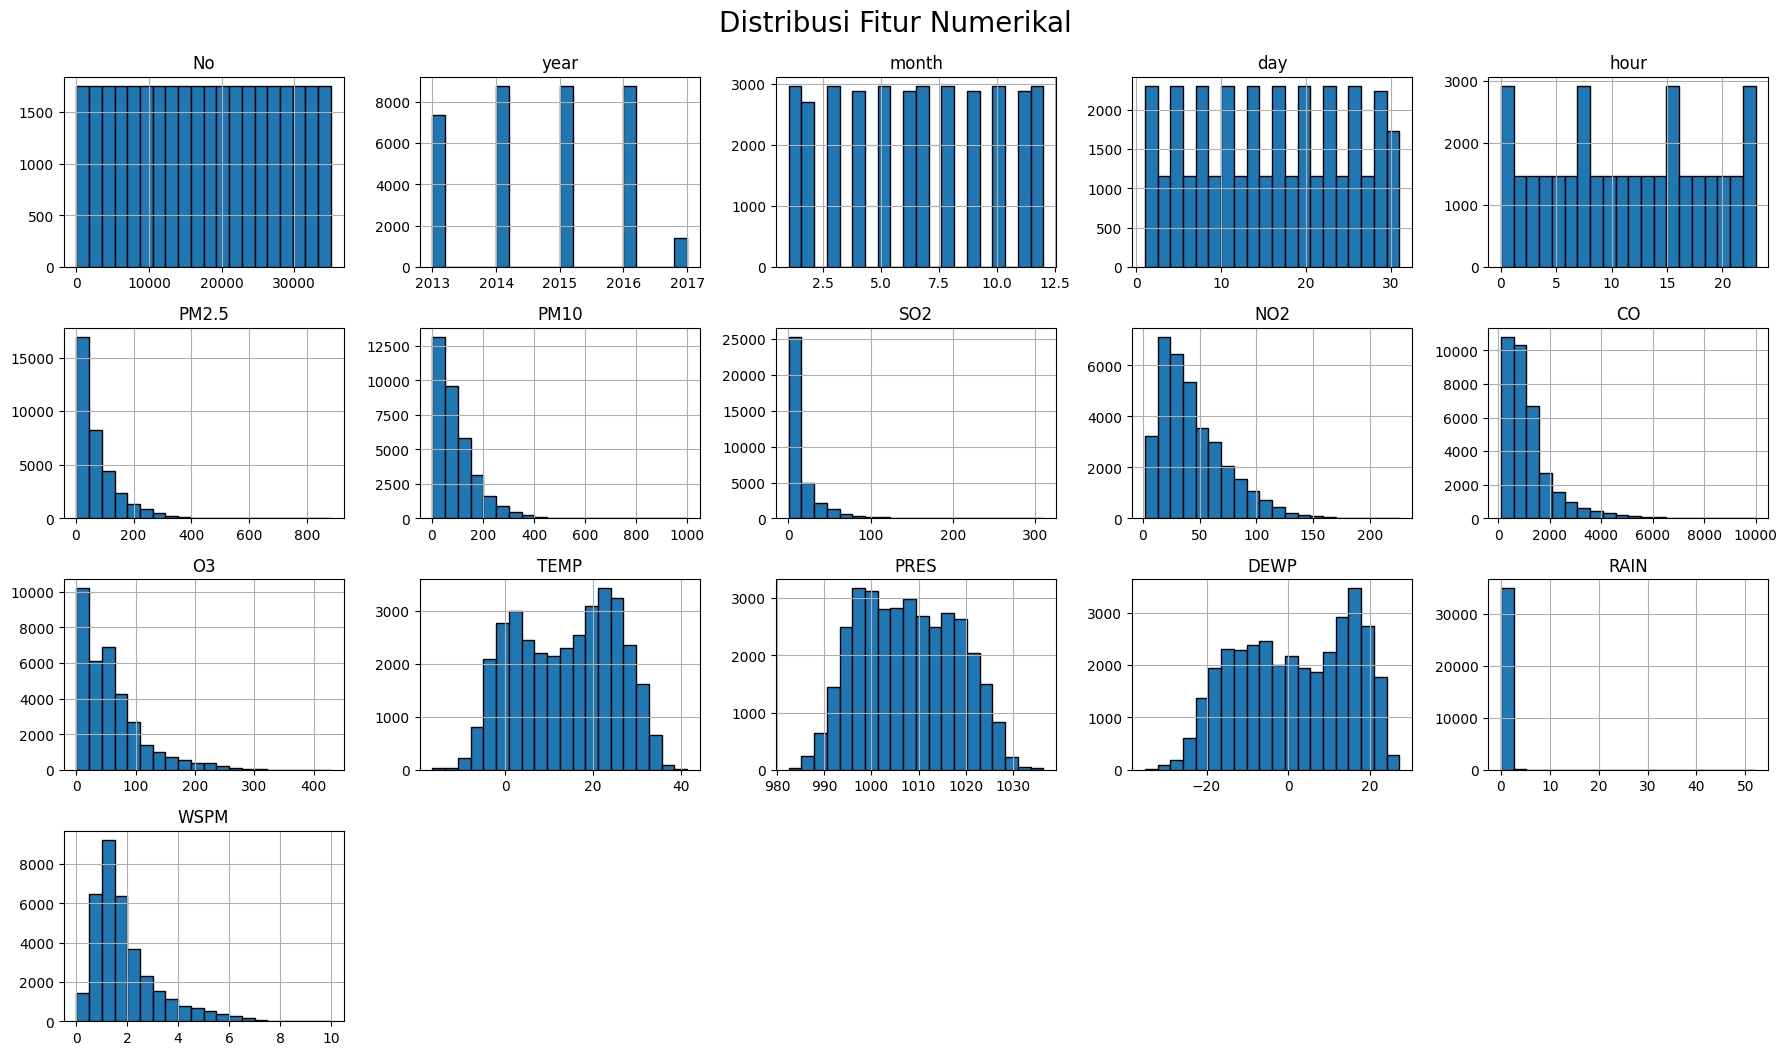

In [11]:
# Tentukan ukuran figure dan grid
plt.figure(figsize=(18, 15))
data_df[numeric_cols].hist(bins=20, layout=(6, 5), figsize=(18, 15), edgecolor='black')
plt.tight_layout()
plt.suptitle("Distribusi Fitur Numerikal", fontsize=20, y=1.02)
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Suhu Bulanan

<ipython-input-12-1768e924cc75>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_df['TEMP'].resample('M').mean().plot(marker='o', linestyle='-', color='r')


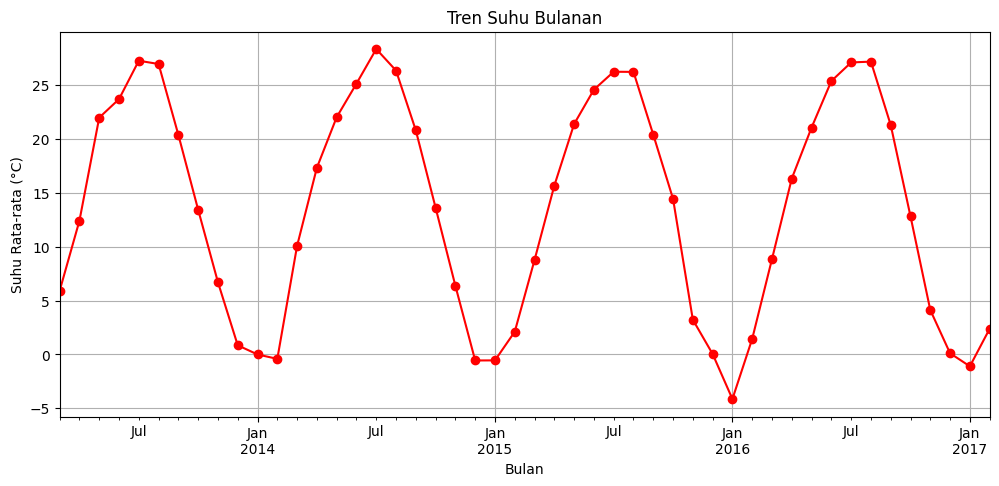

In [12]:
# Visualisasi tren suhu bulanan
plt.figure(figsize=(12, 5))
data_df['TEMP'].resample('M').mean().plot(marker='o', linestyle='-', color='r')
plt.title("Tren Suhu Bulanan")
plt.xlabel("Bulan")
plt.ylabel("Suhu Rata-rata (°C)")
plt.grid(True)
plt.show()

### Pertanyaan 2: Tren PM 2.5 Bulanan

<ipython-input-13-9839b2440778>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_df['PM2.5'].resample('M').mean().plot(marker='o', linestyle='-', color='b')


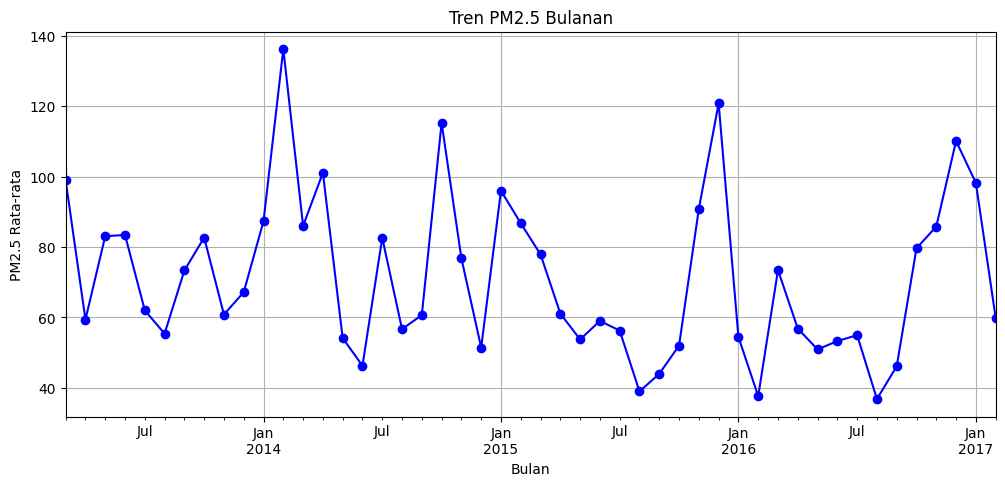

In [13]:
# Visualisasi tren PM2.5 bulanan
plt.figure(figsize=(12, 5))
data_df['PM2.5'].resample('M').mean().plot(marker='o', linestyle='-', color='b')
plt.title("Tren PM2.5 Bulanan")
plt.xlabel("Bulan")
plt.ylabel("PM2.5 Rata-rata")
plt.grid(True)
plt.show()

## Analisis Lanjutan (Opsional)

Geospital Analysis

In [14]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Geospatial Analysis
locations = {"Changping": [40.22, 116.23]}
data_df['latitude'] = locations['Changping'][0]
data_df['longitude'] = locations['Changping'][1]
# Misal data punya kolom: Latitude, Longitude, PM2_5
# Assuming data_df has 'latitude', 'longitude', and 'PM2.5' columns
m = folium.Map(location=[-6.2, 106.8], zoom_start=10)

# Prepare data for heatmap: list of [latitude, longitude, intensity]
# Ensure data_df has 'latitude' and 'longitude' columns with valid coordinates
heat_data = data_df[['latitude', 'longitude', 'PM2.5']].dropna().values.tolist()

# Tambahkan heatmap
HeatMap(heat_data).add_to(m)

m  # tampilkan peta

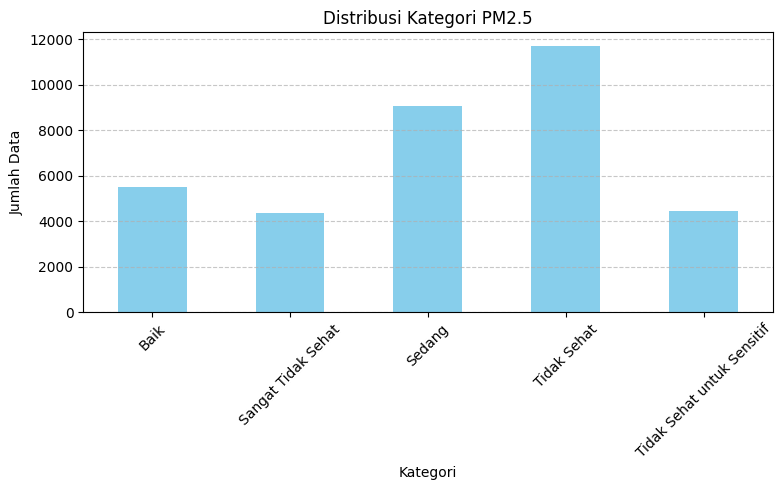

In [15]:
def group_pm25(value):
    if value <= 12:
        return 'Baik'
    elif value <= 35.4:
        return 'Sedang'
    elif value <= 55.4:
        return 'Tidak Sehat untuk Sensitif'
    elif value <= 150.4:
        return 'Tidak Sehat'
    else:
        return 'Sangat Tidak Sehat'

data_df['PM2_5_Category'] = data_df['PM2.5'].apply(group_pm25)


import matplotlib.pyplot as plt

# Hitung jumlah data per kategori
pm25_counts = data_df['PM2_5_Category'].value_counts().sort_index()

# Bar chart
plt.figure(figsize=(8, 5))
pm25_counts.plot(kind='bar', color='skyblue')
plt.title('Distribusi Kategori PM2.5')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


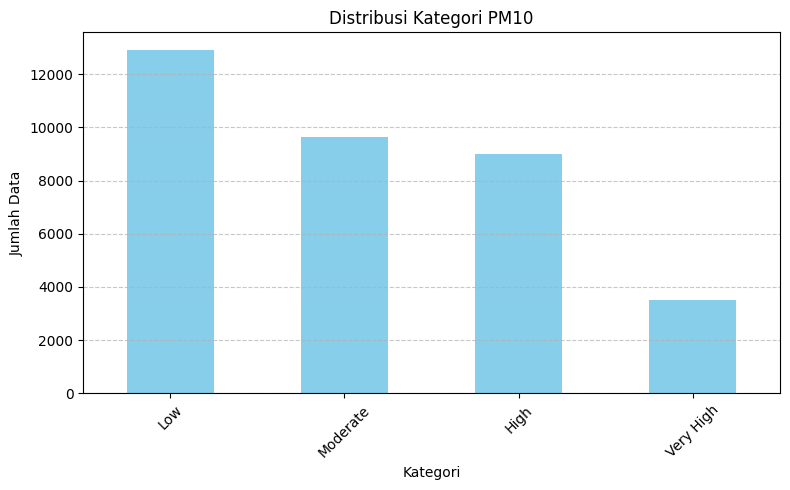

In [16]:
# Binning ke dalam 4 kelompok berdasarkan PM10
bins = [0, 50, 100, 200, data_df['PM10'].max()]
labels = ['Low', 'Moderate', 'High', 'Very High']
data_df['PM10_Bin'] = pd.cut(data_df['PM10'], bins=bins, labels=labels, include_lowest=True)

# Hitung jumlah data per kategori
pm25_counts = data_df['PM10_Bin'].value_counts().sort_index()

# Bar chart
plt.figure(figsize=(8, 5))
pm25_counts.plot(kind='bar', color='skyblue')
plt.title('Distribusi Kategori PM10')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

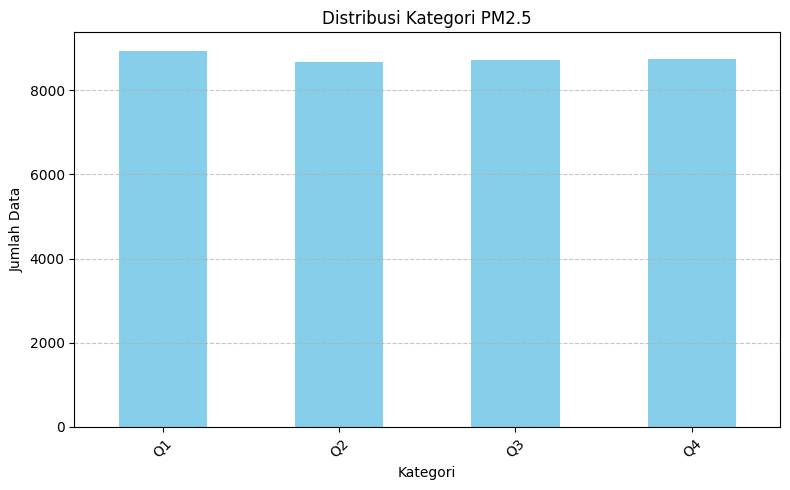

In [17]:
data_df['PM2_5_Quantile'] = pd.qcut(data_df['PM2.5'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Hitung jumlah data per kategori
pm25_counts = data_df['PM2_5_Quantile'].value_counts().sort_index()

# Bar chart
plt.figure(figsize=(8, 5))
pm25_counts.plot(kind='bar', color='skyblue')
plt.title('Distribusi Kategori PM2.5')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1
1. Suhu tertinggi dalam setahun mencapai sekitar 27–30°C pada puncak musim panas.
2. Suhu terendah turun hingga sekitar -5°C hingga 0°C pada musim dingin.
3. Perubahan suhu cukup drastis antara musim panas dan musim dingin, menunjukkan wilayah dengan perbedaan suhu musiman yang jelas.
4. Setiap tahun menunjukkan tren yang konsisten, dengan puncak suhu terjadi di pertengahan tahun dan titik terendah di awal tahun berikutnya.

- Conclution pertanyaan 2
1. Konsentrasi PM2.5 cenderung lebih tinggi selama musim dingin (sekitar Desember - Februari).
2. Konsentrasi lebih rendah selama musim panas (sekitar Juni - Agustus).
3. Hal ini menunjukkan bahwa musim dingin memiliki tingkat polusi udara lebih tinggi dibanding musim lainnya.